In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
train_df = pd.read_excel("Data_Train.xlsx")
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
test_df = pd.read_excel("Test_set.xlsx")
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [4]:
final_df = pd.concat([train_df, test_df], ignore_index=True)
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [5]:
final_df.shape

(13354, 11)

In [6]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [7]:
final_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
final_df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [9]:
final_df["Airline"].value_counts()

Airline
Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: count, dtype: int64

## Feture Engnieering

### Date_of_Journey

In [10]:
final_df['Date_of_Journey'] = pd.to_datetime(final_df['Date_of_Journey'], format='%d/%m/%Y')

In [11]:
final_df['Day'] = final_df['Date_of_Journey'].dt.day
final_df['Month'] = final_df['Date_of_Journey'].dt.month
final_df['Year'] = final_df['Date_of_Journey'].dt.year

In [12]:
final_df.drop('Date_of_Journey', axis=1, inplace=True)

### Arrival_Time

In [13]:
final_df['Arrival_Time'] = final_df['Arrival_Time'].str.split(' ').str[0]

In [14]:
final_df['Arr_Hour'] = final_df['Arrival_Time'].str.split(':').str[0]
final_df['Arr_Minute'] = final_df['Arrival_Time'].str.split(':').str[1]

In [15]:
final_df['Arr_Hour'] = final_df['Arr_Hour'].astype(int)
final_df['Arr_Minute'] = final_df['Arr_Minute'].astype(int)

In [16]:
final_df.drop('Arrival_Time', axis=1, inplace=True)

## Departure Time

In [17]:
final_df['Dep_hour'] = final_df['Dep_Time'].str.split(':').str[0]
final_df['Dep_minute'] = final_df['Dep_Time'].str.split(':').str[1]

In [18]:
final_df['Dep_hour'] = final_df['Dep_hour'].astype(int)
final_df['Dep_minute'] = final_df['Dep_minute'].astype(int)

In [19]:
final_df.drop('Dep_Time', axis=1, inplace=True)

### Total_stops

In [20]:
final_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [21]:
final_df['Total_Stops'] = final_df['Total_Stops'].map({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4, 'NaN':1})

In [22]:
final_df.drop('Route', axis=1, inplace=True)

### Duration

In [23]:
final_df['Duration_hour'] = final_df['Duration'].str.split(' ').str[0]
final_df['Duration_minute'] = final_df['Duration'].str.split(' ').str[1]

In [24]:
# final_df['Duration_hour'] = final_df['Duration_hour'].str.replace('h', '')
# final_df['Duration_hour'] = final_df['Duration_hour'].astype(int64)

In [25]:
import re
final_df['Duration_hour'] = final_df['Duration_hour'].str.extract(r'(\d+)')
final_df['Duration_hour'] = final_df['Duration_hour'].astype(int)

In [26]:
final_df['Duration_minute'] = final_df['Duration_minute'].str.replace('m', '')
final_df['Duration_minute'].fillna(method='ffill', inplace=True)
final_df['Duration_minute'] = final_df['Duration_minute'].astype(int)

C:\Users\Abu Bin Fahd\AppData\Local\Temp\ipykernel_5688\669892813.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['Duration_minute'].fillna(method='ffill', inplace=True)
C:\Users\Abu Bin Fahd\AppData\Local\Temp\ipykernel_5688\669892813.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_df['Duration_minute'].fillna(method='ffill', inplace=True)


In [27]:
final_df.drop('Duration', axis=1, inplace=True)

In [28]:
final_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Arr_Hour,Arr_Minute,Dep_hour,Dep_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.0,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2.0,No info,7662.0,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2.0,No info,13882.0,9,6,2019,4,25,9,25,19,25
3,IndiGo,Kolkata,Banglore,1.0,No info,6218.0,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1.0,No info,13302.0,1,3,2019,21,35,16,50,4,45


In [32]:
final_df['Source'].value_counts()

Source
Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: count, dtype: int64

Text(0, 0.5, 'Count')

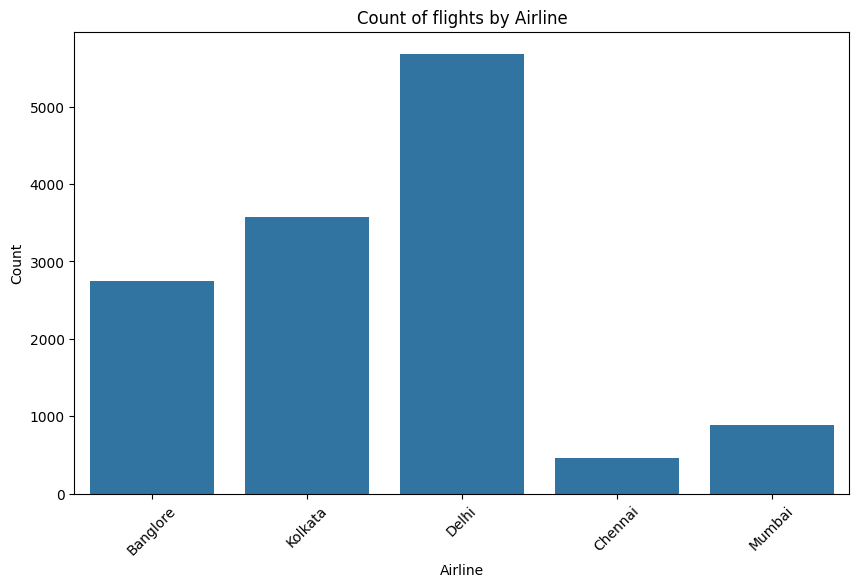

In [31]:
# Count plot for 'Airline'
plt.figure(figsize=(10, 6))
sns.countplot(data=final_df, x='Source')
plt.xticks(rotation=45)
plt.title('Count of flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Count')

In [33]:
final_df['Airline'].value_counts()

Airline
Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: count, dtype: int64

Text(0, 0.5, 'Count')

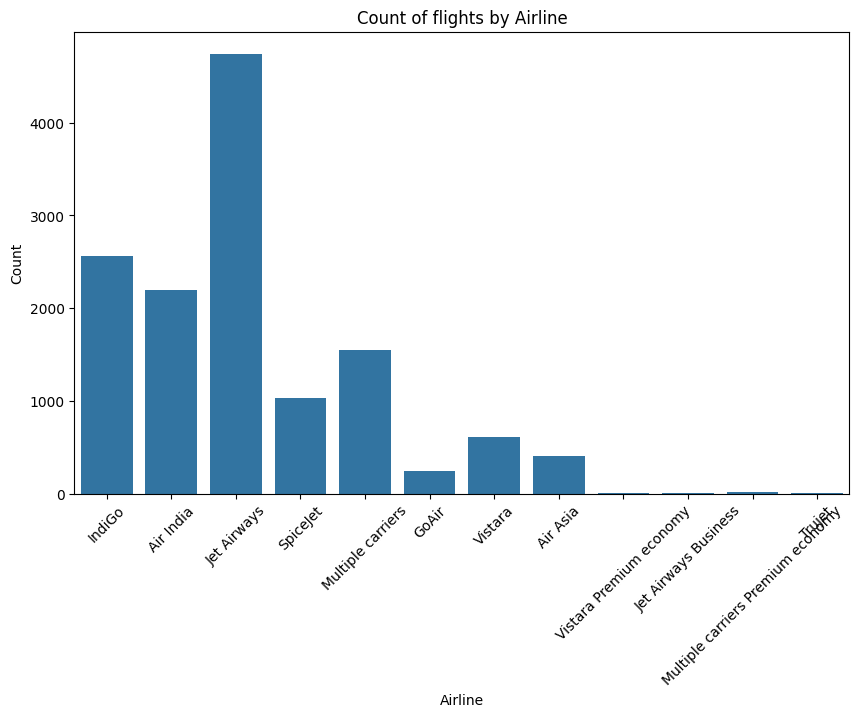

In [34]:
# Count plot for 'Airline'
plt.figure(figsize=(10, 6))
sns.countplot(data=final_df, x='Airline')
plt.xticks(rotation=45)
plt.title('Count of flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Count')

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(final_df['Additional_Info'])

LabelEncoder()

In [36]:
le.classes_

array(['1 Long layover', '1 Short layover', '2 Long layover',
       'Business class', 'Change airports', 'In-flight meal not included',
       'No Info', 'No check-in baggage included', 'No info',
       'Red-eye flight'], dtype=object)

In [48]:
final_df['Additional_Info'] = le.transform(final_df['Additional_Info'])

In [49]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Total_Stops      13353 non-null  float64
 4   Additional_Info  13354 non-null  int32  
 5   Price            10683 non-null  float64
 6   Day              13354 non-null  int32  
 7   Month            13354 non-null  int32  
 8   Year             13354 non-null  int32  
 9   Arr_Hour         13354 non-null  int32  
 10  Arr_Minute       13354 non-null  int32  
 11  Dep_hour         13354 non-null  int32  
 12  Dep_minute       13354 non-null  int32  
 13  Duration_hour    13354 non-null  int32  
 14  Duration_minute  13354 non-null  int32  
dtypes: float64(2), int32(10), object(3)
memory usage: 1.0+ MB


In [50]:
final_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Arr_Hour,Arr_Minute,Dep_hour,Dep_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,0.0,8,3897.0,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2.0,8,7662.0,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2.0,8,13882.0,9,6,2019,4,25,9,25,19,25
3,IndiGo,Kolkata,Banglore,1.0,8,6218.0,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1.0,8,13302.0,1,3,2019,21,35,16,50,4,45
